# MMAI 894 - Deep Learning
## Dr. Ofer Shai
### Pothole Detection Model
### Selected Architecture
### Team Bloor

In [ ]:
# Import modules
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from tqdm import tqdm
import os
import random as rn
import cv2
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.utils.np_utils import to_categorical


from numpy.random import seed
seed(223)
tf.random.set_seed(223)

### 2. Load Data


*   Data is loaded from Dropbox
*   There are two (2) datasets that will be uploaded as zipped files and then unzipped in this notebook

In [ ]:
!wget https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0

--2021-04-04 01:48:14--  https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip [following]
--2021-04-04 01:48:15--  https://www.dropbox.com/s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce0d22ad833268ff68d78c59981.dl.dropboxusercontent.com/cd/0/inline/BL8MYFHctwQZKqwZS02lDEofN6yfVbWWdjmp2X9F_q2v66cxTXXjwTy5KriTlG5yeKz_YliO2We7fayuRIy-jPx8IB2odW42P4Ps8NO4cWTuEHl3S6ZjeG1U_7BPGDgJKobUIGPW9SNXQbahblLekD7D/file# [following]
--2021-04-04 01:48:15--  https://uce0d22ad833268ff68d78c59981.dl.dropboxusercontent.com/cd/0/inline/BL8MYFHctwQZKqwZS02lDEofN6yfVbWWdjmp2X9F_q2v66cxTXXjwTy5KriTlG5yeKz

In [ ]:
!wget https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0

--2021-04-04 01:48:25--  https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/edhsf4jxdwdbddz/potholes.zip [following]
--2021-04-04 01:48:26--  https://www.dropbox.com/s/raw/edhsf4jxdwdbddz/potholes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05ddddeda51986bd8569f7fbcc.dl.dropboxusercontent.com/cd/0/inline/BL91MTWGXKk6fddehsYK5lz8LiJ350Y5qeHrjeSOsZdRXXOx80xDCOgUuX-Hr3JInw-mR44Fn91dbbAO12sGc4pMdTw2GUbm06qdpTvPOJoP6qJQMlmJ9rpZ-pGqTcpKmTF3Xz8k3KSGwPTr5jm7_O4b/file# [following]
--2021-04-04 01:48:26--  https://uc05ddddeda51986bd8569f7fbcc.dl.dropboxusercontent.com/cd/0/inline/BL91MTWGXKk6fddehsYK5lz8LiJ350Y5qeHrjeSOsZdRXXOx80xDCOgUuX-Hr3JInw-mR44Fn91dbbAO12

In [ ]:
# Unzip the No Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/no_pothole_v2.zip?dl=0'

In [ ]:
# Unzip the Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/potholes.zip?dl=0'

### 3. Data Preprocessing

The following steps will be taken to preprocess the data:
1.   Read in the images from the datasets and resize them
2.   Assign each image a label (i.e. No Pothole vs Pothole)
3.   Plot sample images to assure the labels have been assigned correctly
4.   Encode the labels
5. Split the data into training and test sets

In [ ]:
# This function reads in the images one at a time through the 'for' loop and resizes them and assigns a label

def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

In [ ]:
# Running the 'make_train_data' function defined above on the two (2) datasets
# X will be a list of images, stored as an array
# Z will be a list of labels 

X=[]
Z=[]
IMG_SIZE=250

no_potholes='../content/no_pothole_v2/'
potholes='../content/potholes/'

make_train_data('NO POTHOLES',no_potholes)
make_train_data('POTHOLES',potholes)

100%|██████████| 718/718 [00:06<00:00, 102.78it/s]


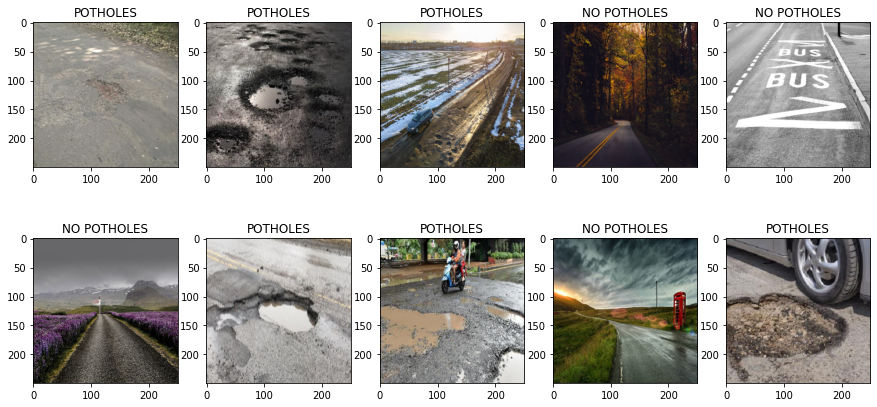

In [ ]:
# Plotting ten (10) randomly selected images, along with their assigned labels as the title

fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [ ]:
# Encoding the labels and assigning the encoded labels to 'Y'

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)

print(Y)

# Normalize the X values using L2 normalization
X=np.array(X)
X=X/255

# Split data into training and test sets
# Assigning 15% of the data to the test sets and remaining to the training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

[0 0 0 ... 1 1 1]


In [ ]:
# Printing shapes of X, X_train, and X_test to assure the split was done correctly

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1534, 250, 250, 3)
(1303, 250, 250, 3)
(231, 250, 250, 3)


### 4. Modelling - Training and Building Model


*   Building the model architecture based on the tuned hyperparameter values

In [ ]:
# Build Model

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (250, 250, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
       
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(224, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 224)               2

In [ ]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train model

history = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.15)


Epoch 1/50
35/35 [==============================] - 19s 74ms/step - loss: 0.7701 - accuracy: 0.5873 - val_loss: 0.5642 - val_accuracy: 0.7755
Epoch 2/50
35/35 [==============================] - 2s 53ms/step - loss: 0.4862 - accuracy: 0.7756 - val_loss: 0.4954 - val_accuracy: 0.7704
Epoch 3/50
35/35 [==============================] - 2s 53ms/step - loss: 0.3701 - accuracy: 0.8475 - val_loss: 0.4469 - val_accuracy: 0.7653
Epoch 4/50
35/35 [==============================] - 2s 53ms/step - loss: 0.4145 - accuracy: 0.8314 - val_loss: 0.4365 - val_accuracy: 0.7908
Epoch 5/50
35/35 [==============================] - 2s 53ms/step - loss: 0.3441 - accuracy: 0.8630 - val_loss: 0.4272 - val_accuracy: 0.7959
Epoch 6/50
35/35 [==============================] - 2s 53ms/step - loss: 0.3591 - accuracy: 0.8575 - val_loss: 0.3925 - val_accuracy: 0.8469
Epoch 7/50
35/35 [==============================] - 2s 53ms/step - loss: 0.3171 - accuracy: 0.8797 - val_loss: 0.3709 - val_accuracy: 0.8673
Epoch 8/50
3

### 5. Model Evaluation

In [ ]:
# evaluate model

test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


8/8 [==============================] - 0s 26ms/step - loss: 0.2755 - accuracy: 0.9048
Test Loss: 0.276, Test Accuracy: 0.905


In [ ]:
# Generate Classification Report

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

target_names = ['No Pothole', 'Pothole']

print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

  No Pothole       0.92      0.90      0.91       120
     Pothole       0.89      0.91      0.90       111

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231



In [ ]:
# Generate Confusion Matrix

labels=([0,1])
cmtx = pd.DataFrame(
confusion_matrix(Y_test, y_pred.round(), labels=labels), 
index=['  true:{:}'.format(x) for x in labels], 
columns=['pred:{:}'.format(x) for x in labels])
print(cmtx)

          pred:0  pred:1
  true:0     108      12
  true:1      10     101


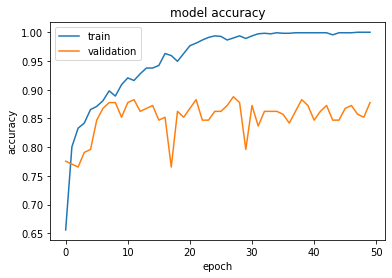

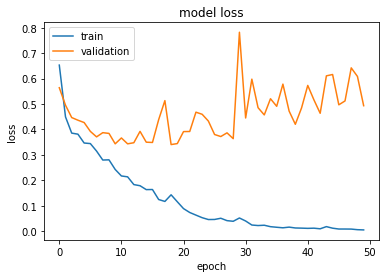

In [ ]:
# Plot training and validation accuracy and loss over epochs

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

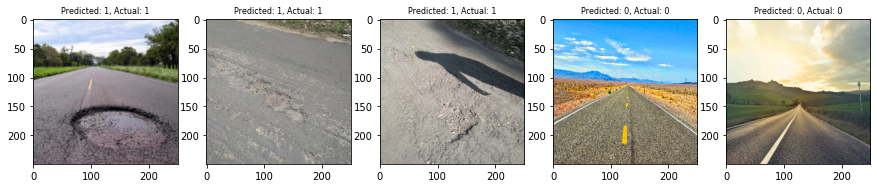

In [ ]:
# Plotting correct predictions

# Assigning the predicted and actual outputs to a class (0 or 1)
Y_pred_classes = y_pred.round()
Y_test_classes = Y_test.round()

# Creating a blank list for all correct predictions
cor_pred = []

# Comparing the predicted and actual outputs and adding the index of the correct predictions to the cor_pred list
for y in range(0,len(Y_pred_classes)):
  if Y_pred_classes[y] == Y_test_classes[y]:
    cor_pred.append(y)

# Creating a sample of five (5) random correct predictions
x1 = rn.randint(0,len(cor_pred)-5)
x2 = x1+5
cor_pred_sample = cor_pred[x1:x2]

# Plotting the sample of five (5) correct predictions
n_plots = 5

f, ax2=plt.subplots(1, 5, figsize=(20,20))
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
f.set_size_inches(15,15)

for i in range(0,n_plots):
    value = X_test[cor_pred_sample[i]][:,:,::-1]
    ax2[i].imshow(value.reshape(250,250,3))
    ax2[i].set_title("Predicted: {}, Actual: {}".format(int(Y_pred_classes[cor_pred_sample[i]][0]),Y_test_classes[cor_pred_sample[i]]), fontsize=8)
    ax2[i].set_aspect('equal')


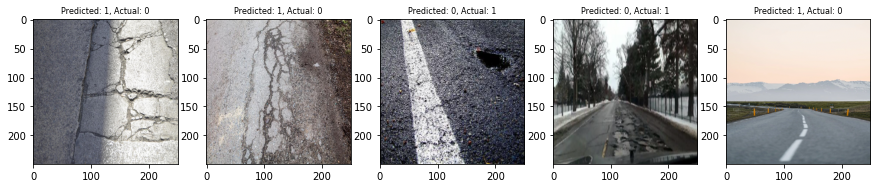

In [ ]:
# Plotting incorrect predictions

# Creating a blank list for all incorrect predictions
inc_pred = []
    
# Comparing the predicted and actual outputs and adding the index of the incorrect predictions to the inc_pred list
for x in range(0,len(Y_pred_classes)):
  if Y_pred_classes[x] != Y_test_classes[x]:
    inc_pred.append(x)

# Creating a sample of five (5) random incorrect predictions
x3 = rn.randint(0,len(inc_pred)-5)
x4 = x3+5
inc_pred_sample = inc_pred[x3:x4]

# Plotting the sample of five (5) incorrect predictions

f2, ax3=plt.subplots(1, 5, figsize=(20,20))
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
f2.set_size_inches(15,15)

for i in range(0,n_plots):
    value = X_test[inc_pred_sample[i]][:,:,::-1]
    ax3[i].imshow(value.reshape(250,250,3))
    ax3[i].set_title("Predicted: {}, Actual: {}".format(int(Y_pred_classes[inc_pred_sample[i]][0]),Y_test_classes[inc_pred_sample[i]]), fontsize=8)
    ax3[i].set_aspect('equal')

### 6. Test Model Feasibility
#### - Testing model performance on random images of roadway obtained from Google Image search

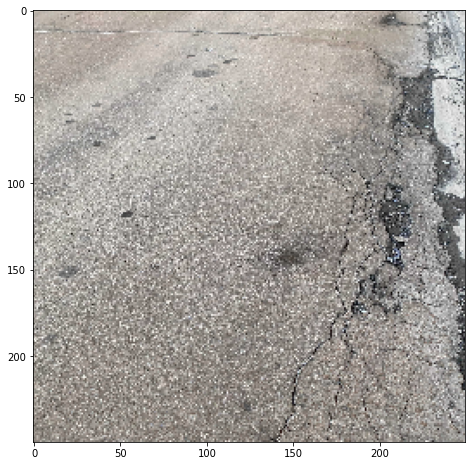

In [ ]:
# import random image
# this requires image to be manually added to the Google Colab's Files and set the 'test_path' equal to the file path of the image

test_path = '../content/test_img2.jpg'

test_img = cv2.imread(test_path,cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (IMG_SIZE,IMG_SIZE))

f3,ax4=plt.subplots(1,1)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
f3.set_size_inches(15,15)

ax4.imshow(test_img)

In [ ]:
test_img_dim = expand_dims(test_img, axis=0)

test_img_dim.shape

(1, 250, 250, 3)

In [ ]:
# predict class of random image

y_ran_pred = model.predict(test_img_dim)

print(y_ran_pred)

prediction = y_ran_pred.round()

if prediction == 0:
  print("This image has no potholes")

else:
  print("This image has pothole(s)")

[[1.]]
This image has pothole(s)
